In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('results-survey250319.csv')
df = df.drop(df.columns[[range(0,6)]], axis=1)
df.rename(columns={df.columns[0]: 'Country', df.columns[1]: 'Business Category'\
                   , df.columns[2]: 'Business Category [Business Category - Other]'\
                   , df.columns[12]: 'Campaign Run'}, inplace=True)

types_of_network = ['Country', 'Business Category [Business Category - Other]',
                    'Campaign Run',
                    '5._Please_provide_more_information.',
                    '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']

business_category = ['3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']

reasons =['Business Category [Business Category - Other]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Research]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Censorship_Measurement]',
              "6._Please_state_your_main_purpose_for_running_network_measurements?_[I_don't_run_any_measurement]",
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]']
#df[df['Country'].isnull()]
df['Country'].replace(np.nan, "Other", inplace=True)

df['Business Category [Business Category - Other]'].value_counts()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Groupe des Opérateurs Réseaux (NOG)           1
Cloud Computing Solution                      1
Telecom operator, both Mobile and Landline    1
Name: Business Category [Business Category - Other], dtype: int64

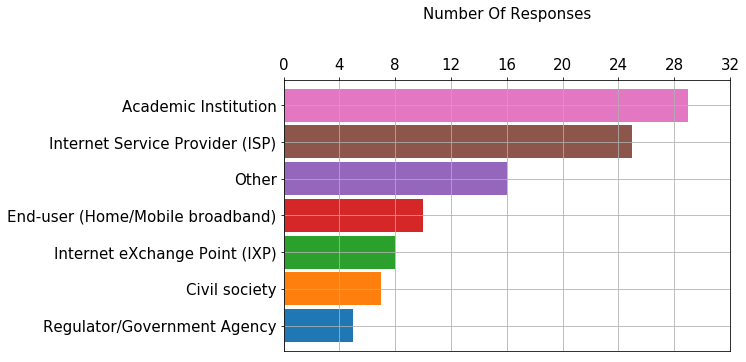

In [78]:
#Number of Responses by Business Category with [Other] answers included
def network_responses():
    col = df['Business Category'].value_counts()
    other = df['Business Category [Business Category - Other]'
              ].value_counts()
    #new = pd.concat([col1, other], axis=0)
    
    
    #Adding major categories
    ispsum = col.loc['Telecom (Mobile) Operator'] + col.loc['Wireless network'] \
    + 1 #the 1 added is from the one responpse from a Telecom operator under the Business Category - Other
    col.loc['Internet Service Provider (ISP)'] += ispsum
    col.loc['Academic Institution'] += col.loc['Academic network (NRENs)']
    col.loc['Internet eXchange Point (IXP)'] += 1 # 1 added because of an IXP response in Business Category - Other
    col.loc['Other'] -= 2 #As two counts of the entries are already to other categories
    grouped = col.loc['Community Network'] + col.loc['Enterprise Network'] \
    + col.loc['ccTLD/DNS Operator'] + col.loc['Datacentre']
    col.loc['Other'] += grouped
    
    col.drop(['Academic network (NRENs)', 'Telecom (Mobile) Operator', 'Wireless network',\
             'Enterprise Network', 'Community Network', 'ccTLD/DNS Operator',\
             'Datacentre'], inplace=True)

    
    col = col.sort_values()
    ax = col.plot(kind='barh', figsize=(8,5), legend=False, width=.9, grid=True)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    xticks = [0, 4, 8, 12, 16, 20, 24, 28, 32]
    plt.xticks(xticks, fontsize=15)
    plt.xlabel("Number Of Responses\n\n", fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    return 
network_responses()